<div style="color:white;background-color:Black;padding:3%;border-radius:150px 150px;font-size:2.5em;text-align:center">Pandas toolkit Part 4</div>

<center>
<img src="https://i1.wp.com/www.datascienceexamples.com/wp-content/uploads/2019/10/python-and-pandas.jpg?resize=800%2C286&ssl=1" width=1200>
</center>

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.DataFrame(
{
"one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
"two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
"three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
}
)
unsorted_df = df.reindex(
index=["a", "d", "c", "b"], columns=["three", "two", "one"]
)

unsorted_df

,three,two,one
a,NaN,-0.979845,0.813383
d,-0.323117,1.232922,NaN
c,-0.644493,1.546210,-0.016046
b,0.709829,0.393134,-0.095849


In [3]:
unsorted_df.sort_index()

,three,two,one
a,NaN,-0.979845,0.813383
b,0.709829,0.393134,-0.095849
c,-0.644493,1.546210,-0.016046
d,-0.323117,1.232922,NaN


In [4]:
unsorted_df.sort_index(ascending=False)

,three,two,one
d,-0.323117,1.232922,NaN
c,-0.644493,1.546210,-0.016046
b,0.709829,0.393134,-0.095849
a,NaN,-0.979845,0.813383


In [5]:
unsorted_df.sort_index(axis=1)

,one,three,two
a,0.813383,NaN,-0.979845
d,NaN,-0.323117,1.232922
c,-0.016046,-0.644493,1.546210
b,-0.095849,0.709829,0.393134


In [6]:
unsorted_df["three"].sort_index()

a         NaN
b    0.709829
c   -0.644493
d   -0.323117
Name: three, dtype: float64

In [7]:
s1 = pd.DataFrame({"a": ["B", "a", "C"], "b": [1, 2, 3], "c": [2, 3, 4]}).set_index(list("ab"))
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [8]:
s1.sort_index(level="a")

,,c
a,b,
B,1,2
C,3,4
a,2,3


In [9]:
s1.sort_index(level="a", key=lambda idx: idx.str.lower())

,,c
a,b,
a,2,3
B,1,2
C,3,4


In [10]:
df1 = pd.DataFrame({"one": [2, 1, 1, 1], "two": [1, 3, 2, 4], "three": [5, 4, 3, 2]})

df1.sort_values(by="two")

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


In [11]:
df1[["one", "two", "three"]].sort_values(by=["one", "two"])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


In [12]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    0.350851
b   -0.934945
c   -0.286276
d   -1.113814
e   -0.906301
dtype: float64

In [13]:
s[2] = np.nan
s.sort_values()

d   -1.113814
b   -0.934945
e   -0.906301
a    0.350851
c         NaN
dtype: float64

In [14]:
s.sort_values(na_position="first")

c         NaN
d   -1.113814
b   -0.934945
e   -0.906301
a    0.350851
dtype: float64

In [15]:
s1 = pd.Series(["B", "a", "C"])
s1.sort_values()

0    B
2    C
1    a
dtype: object

In [16]:
df = pd.DataFrame({"a": ["B", "a", "C"], "b": [1, 2, 3]})
df.sort_values(by="a")

,a,b
0,B,1
2,C,3
1,a,2


In [17]:
df.sort_values(by="a", key=lambda col: col.str.lower())

,a,b
1,a,2
0,B,1
2,C,3


In [18]:
idx = pd.MultiIndex.from_tuples([("a", 1), ("a", 2), ("a", 2), ("b", 2), ("b", 1), ("b", 1)])
idx.names = ["first", "second"]
df_multi = pd.DataFrame({"A": np.arange(6, 0, -1)}, index=idx)
df_multi

A
first second   
a     1       6
      2       5
      2       4
b     2       3
      1       2
      1       1

In [19]:
df_multi.sort_values(by=["second", "A"])

A
first second   
b     1       1
      1       2
a     1       6
b     2       3
a     2       4
      2       5

In [20]:
ser = pd.Series([1, 2, 3])
ser.searchsorted([0, 3])

array([0, 2])

In [21]:
ser.searchsorted([0, 4])

array([0, 3])

In [22]:
ser.searchsorted([0, 3], sorter=np.argsort(ser))

array([0, 2])

In [23]:
s = pd.Series(np.random.permutation(10))
s

0    2
1    9
2    7
3    5
4    4
5    8
6    1
7    6
8    3
9    0
dtype: int64

In [24]:
df = pd.DataFrame({
"a": [-2, -1, 1, 10, 8, 11, -1],
"b": list("abdceff"),
"c": [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0],
})

df.nlargest(3, "a")

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN


In [25]:
df1.columns = pd.MultiIndex.from_tuples([("a", "one"), ("a", "two"), ("b", "three")])

df1.sort_values(by=("a", "two"))

a         b
  one two three
0   2   1     5
2   1   2     3
1   1   3     4
3   1   4     2

In [26]:
dft = pd.DataFrame({
"A": np.random.rand(3),
"B": 1,
"C": "foo",
"D": pd.Timestamp("20010102"),
"E": pd.Series([1.0] * 3).astype("float32"),
"F": False,
"G": pd.Series([1] * 3, dtype="int8"),
})

dft

,A,B,C,D,E,F,G
0,0.476847,1,foo,2001-01-02,1.0,False,1
1,0.147821,1,foo,2001-01-02,1.0,False,1
2,0.397239,1,foo,2001-01-02,1.0,False,1


In [27]:
df1 = pd.DataFrame(np.random.randn(8, 1), columns=["A"], dtype="float32")
df1

,A
0,1.212135
1,1.186135
2,0.609574
3,-0.721884
4,-0.802943
5,-1.261264
6,0.505729
7,0.496824


In [28]:
df2 = pd.DataFrame({
"A": pd.Series(np.random.randn(8), dtype="float16"),
"B": pd.Series(np.random.randn(8)),
"C": pd.Series(np.array(np.random.randn(8), dtype="uint8")),
})

df2

,A,B,C
0,0.516602,1.091333,255
1,0.425537,1.390435,255
2,0.140137,-0.852130,0
3,0.524414,0.122058,254
4,0.018524,-1.264755,0
5,0.954102,0.732719,0
6,-1.137695,1.613938,0
7,-0.263428,0.105725,0


In [29]:
pd.DataFrame([1, 2], columns=["a"]).dtypes

a    int64
dtype: object

In [30]:
pd.DataFrame({"a": [1, 2]}).dtypes

a    int64
dtype: object

In [31]:
pd.DataFrame({"a": 1}, index=list(range(2))).dtypes

a    int64
dtype: object

In [32]:
df3 = df1.reindex_like(df2).fillna(value=0.0) + df2
df3

,A,B,C
0,1.728737,1.091333,255.0
1,1.611672,1.390435,255.0
2,0.749711,-0.852130,0.0
3,-0.197470,0.122058,254.0
4,-0.784419,-1.264755,0.0
5,-0.307163,0.732719,0.0
6,-0.631966,1.613938,0.0
7,0.233396,0.105725,0.0


In [33]:
df3.to_numpy().dtype

dtype('float64')

In [34]:
df3.astype("float32").dtypes

A    float32
B    float32
C    float32
dtype: object

In [35]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
dft[["a", "b"]] = dft[["a", "b"]].astype(np.uint8)
dft

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [36]:
dft1 = pd.DataFrame({"a": [1, 0, 1], "b": [4, 5, 6], "c": [7, 8, 9]})
dft1 = dft1.astype({"a": np.bool_, "c": np.float64})
dft1

,a,b,c
0,True,4,7.0
1,False,5,8.0
2,True,6,9.0


In [37]:
dft = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
dft.loc[:, ["a", "b"]].astype(np.uint8).dtypes

a    uint8
b    uint8
dtype: object

In [38]:
dft.loc[:, ["a", "b"]] = dft.loc[:, ["a", "b"]].astype(np.uint8)
dft.dtypes

a    int64
b    int64
c    int64
dtype: object

In [39]:
import datetime
df = pd.DataFrame(
[
[1, 2],
["a", "b"],
[datetime.datetime(2016, 3, 2), datetime.datetime(2016, 3,2)],
]
)
df = df.T
df

,0,1,2
0,1,a,2016-03-02
1,2,b,2016-03-02


In [40]:
df.infer_objects().dtypes

0             int64
1            object
2    datetime64[ns]
dtype: object

In [41]:
m = ["1.1", 2, 3]
pd.to_numeric(m)

array([1.1, 2. , 3. ])

In [42]:
import datetime
m = ["2016-07-09", datetime.datetime(2016, 3, 2)]
pd.to_datetime(m)

DatetimeIndex(['2016-07-09', '2016-03-02'], dtype='datetime64[ns]', freq=None)

In [43]:
m = ["5us", pd.Timedelta("1day")]
pd.to_timedelta(m)

TimedeltaIndex(['0 days 00:00:00.000005', '1 days 00:00:00'], dtype='timedelta64[ns]', freq=None)

In [44]:
import datetime
m = ["apple", datetime.datetime(2016, 3, 2)]

In [45]:
pd.to_datetime(m, errors="coerce")

DatetimeIndex(['NaT', '2016-03-02'], dtype='datetime64[ns]', freq=None)

In [46]:
m = ["apple", 2, 3]
pd.to_numeric(m, errors="coerce")

array([nan,  2.,  3.])

In [47]:
m = ["apple", pd.Timedelta("1day")]
pd.to_timedelta(m, errors="coerce")

TimedeltaIndex([NaT, '1 days'], dtype='timedelta64[ns]', freq=None)

In [48]:
import datetime
m = ["apple", datetime.datetime(2016, 3, 2)]
pd.to_datetime(m, errors="ignore")

Index(['apple', 2016-03-02 00:00:00], dtype='object')

In [49]:
m = ["apple", 2, 3]
pd.to_numeric(m, errors="ignore")

array(['apple', 2, 3], dtype=object)

In [50]:
m = ["apple", pd.Timedelta("1day")]
pd.to_timedelta(m, errors="ignore")

array(['apple', Timedelta('1 days 00:00:00')], dtype=object)

In [51]:
import datetime
df = pd.DataFrame([["2016-07-09", datetime.datetime(2016, 3, 2)]] * 2, dtype="O")
df

,0,1
0,2016-07-09,2016-03-02 00:00:00
1,2016-07-09,2016-03-02 00:00:00


In [52]:
df.apply(pd.to_datetime)

,0,1
0,2016-07-09,2016-03-02
1,2016-07-09,2016-03-02


In [53]:
df = pd.DataFrame([["1.1", 2, 3]] * 2, dtype="O")
df

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [54]:
df.apply(pd.to_numeric)

,0,1,2
0,1.1,2,3
1,1.1,2,3


In [55]:
df = pd.DataFrame([["5us", pd.Timedelta("1day")]] * 2, dtype="O")
df

,0,1
0,5us,1 days 00:00:00
1,5us,1 days 00:00:00


In [56]:
df.apply(pd.to_timedelta)

,0,1
0,0 days 00:00:00.000005,1 days
1,0 days 00:00:00.000005,1 days


In [57]:
dfi = df3.astype("int32")
dfi["E"] = 1
dfi

,A,B,C,E
0,1,1,255,1
1,1,1,255,1
2,0,0,0,1
3,0,0,254,1
4,0,-1,0,1
5,0,0,0,1
6,0,1,0,1
7,0,0,0,1


In [58]:
casted = dfi[dfi > 0]
casted

,A,B,C,E
0,1.0,1.0,255.0,1
1,1.0,1.0,255.0,1
2,NaN,NaN,NaN,1
3,NaN,NaN,254.0,1
4,NaN,NaN,NaN,1
5,NaN,NaN,NaN,1
6,NaN,1.0,NaN,1
7,NaN,NaN,NaN,1


In [59]:
df = pd.DataFrame({
"string": list("abc"),
"int64": list(range(1, 4)),
"uint8": np.arange(3, 6).astype("u1"),
"float64": np.arange(4.0, 7.0),
"bool1": [True, False, True],
"bool2": [False, True, False],
"dates": pd.date_range("now", periods=3),
 "category": pd.Series(list("ABC")).astype("category"),
})

In [60]:
df["tdeltas"] = df.dates.diff()
df["uint64"] = np.arange(3, 6).astype("u8")
df["other_dates"] = pd.date_range("20130101", periods=3)
df["tz_aware_dates"] = pd.date_range("20130101", periods=3, tz="US/Eastern")
df

,string,int64,uint8,float64,bool1,bool2,dates,category,tdeltas,uint64,other_dates,tz_aware_dates
0,a,1,3,4.0,True,False,2023-08-19 08:10:01.687819,A,NaT,3,2013-01-01,2013-01-01 00:00:00-05:00
1,b,2,4,5.0,False,True,2023-08-20 08:10:01.687819,B,1 days,4,2013-01-02,2013-01-02 00:00:00-05:00
2,c,3,5,6.0,True,False,2023-08-21 08:10:01.687819,C,1 days,5,2013-01-03,2013-01-03 00:00:00-05:00


In [61]:
df.select_dtypes(include=[bool])

,bool1,bool2
0,True,False
1,False,True
2,True,False


In [62]:
df.select_dtypes(include=["bool"])

,bool1,bool2
0,True,False
1,False,True
2,True,False


In [63]:
df.select_dtypes(include=["number", "bool"], exclude=["unsignedinteger"])

,int64,float64,bool1,bool2,tdeltas
0,1,4.0,True,False,NaT
1,2,5.0,False,True,1 days
2,3,6.0,True,False,1 days


In [64]:
df.select_dtypes(include=["object"])

,string
0,a
1,b
2,c


In [65]:
def subdtypes(dtype):
    subs = dtype.__subclasses__()
    if not subs:
        return dtype
    return [dtype, [subdtypes(dt) for dt in subs]]

In [66]:
subdtypes(np.generic)

[numpy.generic,
 [[numpy.number,
   [[numpy.integer,
     [[numpy.signedinteger,
       [numpy.int8,
        numpy.int16,
        numpy.int32,
        numpy.int64,
        numpy.longlong,
        numpy.timedelta64]],
      [numpy.unsignedinteger,
       [numpy.uint8,
        numpy.uint16,
        numpy.uint32,
        numpy.uint64,
        numpy.ulonglong]]]],
    [numpy.inexact,
     [[numpy.floating,
       [numpy.float16, numpy.float32, numpy.float64, numpy.float128]],
      [numpy.complexfloating,
       [numpy.complex64, numpy.complex128, numpy.complex256]]]]]],
  [numpy.flexible,
   [[numpy.character, [numpy.bytes_, numpy.str_]],
    [numpy.void, [numpy.record]]]],
  numpy.bool_,
  numpy.datetime64,
  numpy.object_]]

In [67]:
import pandas as pd
from io import StringIO
data = "col1,col2,col3\na,b,1\na,b,2\nc,d,3"
pd.read_csv(StringIO(data))

,col1,col2,col3
0,a,b,1
1,a,b,2
2,c,d,3


In [68]:
pd.read_csv(StringIO(data), usecols=lambda x: x.upper() in ["COL1", "COL3"])

,col1,col3
0,a,1
1,a,2
2,c,3


In [69]:
data = "col1,col2,col3\na,b,1"
df = pd.read_csv(StringIO(data))

In [70]:
df.columns = [f"pre_{col}" for col in df.columns]
df

,pre_col1,pre_col2,pre_col3
0,a,b,1


In [71]:
data = "col1,col2,col3\na,b,1\na,b,2\nc,d,3"
pd.read_csv(StringIO(data))

,col1,col2,col3
0,a,b,1
1,a,b,2
2,c,d,3


In [72]:
pd.read_csv(StringIO(data), skiprows=lambda x: x % 2 != 0)

,col1,col2,col3
0,a,b,2


In [73]:
import numpy as np
data = "a,b,c,d\n1,2,3,4\n5,6,7,8\n9,10,11"
print(data)

a,b,c,d
1,2,3,4
5,6,7,8
9,10,11


In [74]:
df = pd.read_csv(StringIO(data), dtype=object)
df

,a,b,c,d
0,1,2,3,4
1,5,6,7,8
2,9,10,11,NaN


In [75]:
df = pd.read_csv(StringIO(data), dtype={"b": object, "c": np.float64, "d":"Int64"})
df.dtypes

a      int64
b     object
c    float64
d      Int64
dtype: object

In [76]:
data = "col_1\n1\n2\n'A'\n4.22"
pd.read_csv(StringIO(data), converters={"col_1": str})
df

,a,b,c,d
0,1,2,3.0,4
1,5,6,7.0,8
2,9,10,11.0,<NA>


In [77]:
df = pd.read_csv(StringIO(data), dtype="category")
df.dtypes

col_1    category
dtype: object

In [78]:
air_quality = pd.read_csv("/kaggle/input/airquality2/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


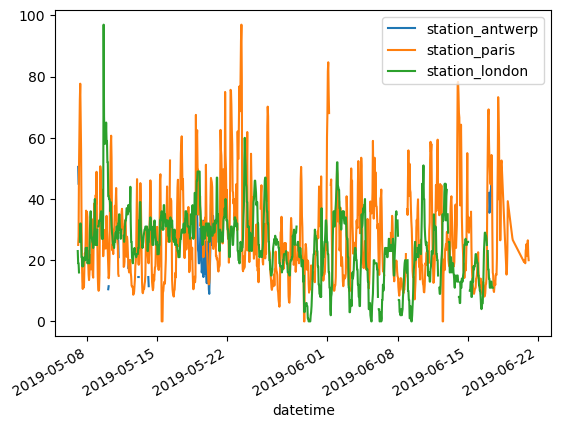

In [79]:
air_quality.plot();

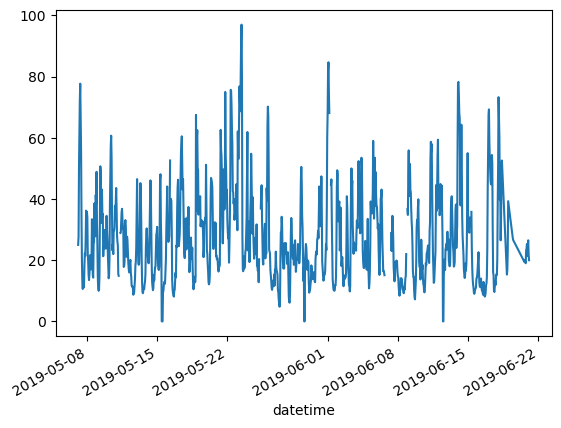

In [80]:
air_quality["station_paris"].plot();

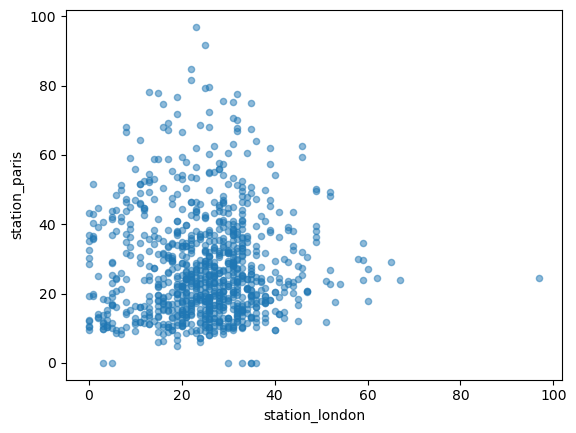

In [81]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5);

In [82]:
[
method_name
for method_name in dir(air_quality.plot)
if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

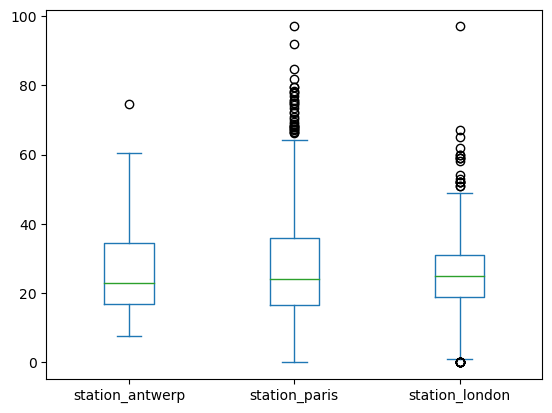

In [83]:
air_quality.plot.box();

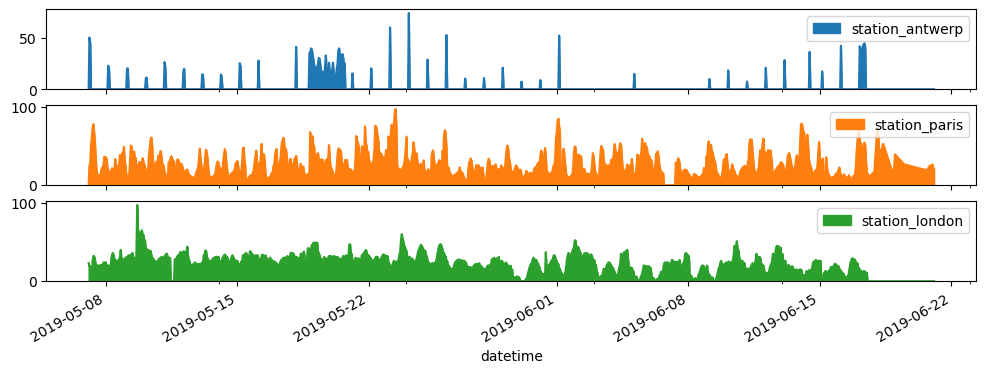

In [84]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True);
axs;

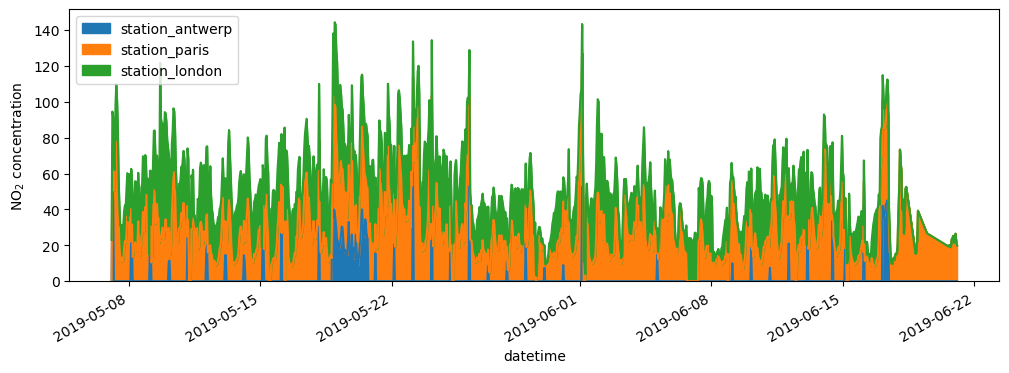

In [85]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("no2_concentrations.png")

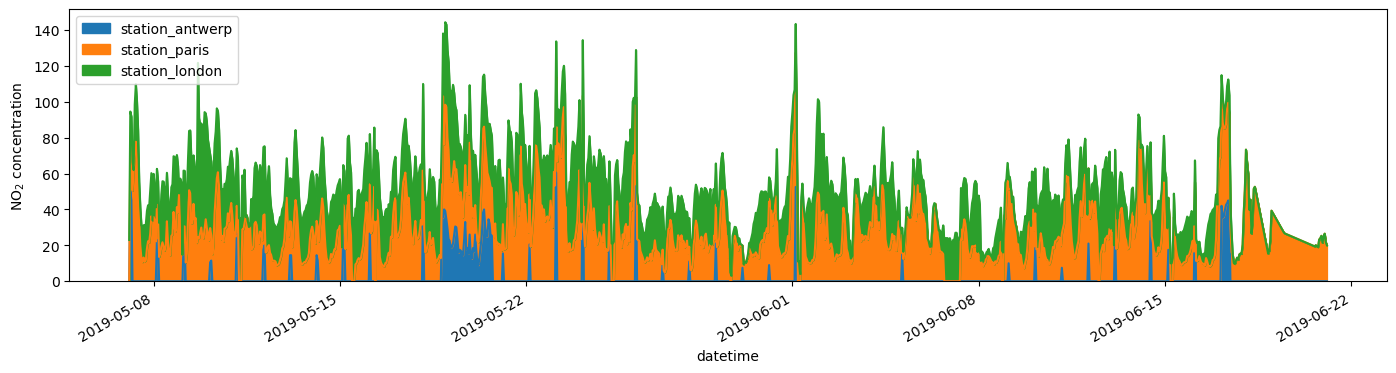

In [86]:
fig, axs = plt.subplots(figsize=(17, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration");

In [87]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [88]:
air_quality["ratio_paris_antwerp"] = (air_quality["station_paris"] / air_quality["station_antwerp"])

air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [89]:
air_quality_renamed = air_quality.rename(
 columns={
 "station_antwerp": "BETR801",
 "station_paris": "FR04014",
 "station_london": "London Westminster",
 }
 )

air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [90]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [91]:
air_quality = pd.read_csv("/kaggle/input/airquality1/air_quality_long.csv", index_col="date.utc", parse_dates=True)

air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [92]:
no2 = air_quality[air_quality["parameter"] == "no2"]

In [93]:
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [94]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


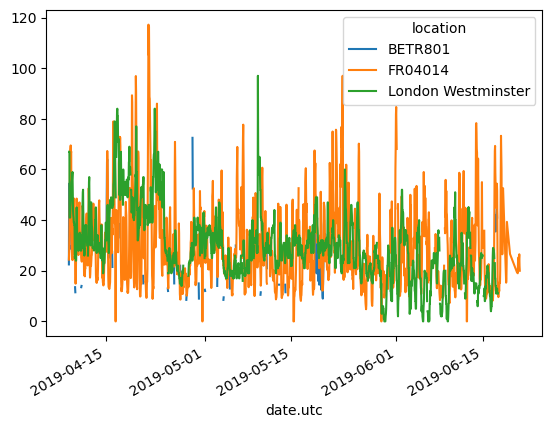

In [95]:
no2.pivot(columns="location", values="value").plot();

In [96]:
air_quality.pivot_table(values="value", index="location", columns="parameter", aggfunc="mean")

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In [97]:
air_quality.pivot_table(
values="value",
index="location",
columns="parameter",
aggfunc="mean",
margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [98]:
air_quality.groupby(["parameter", "location"]).mean()

/tmp/ipykernel_20/2084413015.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  air_quality.groupby(["parameter", "location"]).mean()


value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568

In [99]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


In [100]:
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


In [101]:
no_2 = no2_pivoted.melt(
id_vars="date.utc",
value_vars=["BETR801", "FR04014", "London Westminster"],
value_name="NO_2",
var_name="id_location",
)

no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


In [102]:
air_quality_no2 = pd.read_csv("/kaggle/input/airquality/air_quality_no2_long.csv",parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [103]:
air_quality_pm25 = pd.read_csv("/kaggle/input/airquality3/air_quality_pm25_long.csv",parse_dates=True)

air_quality_pm25 = air_quality_pm25[["date.utc", "location","parameter", "value"]]

air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [104]:

air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [105]:
print('Shape of the ``air_quality_pm25`` table: ', air_quality_pm25.shape)
print('Shape of the ``air_quality_no2`` table: ', air_quality_no2.shape)
print('Shape of the resulting ``air_quality`` table: ', air_quality.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)
Shape of the ``air_quality_no2`` table:  (2068, 4)
Shape of the resulting ``air_quality`` table:  (3178, 4)


In [106]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In [107]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])
air_quality_.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

In [108]:
stations_coord = pd.read_csv("/kaggle/input/airquality4/air_quality_stations.csv")
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [109]:
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182


In [110]:
air_quality_parameters = pd.read_csv("/kaggle/input/airquality1/air_quality_parameters.csv")
air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [111]:
air_quality = pd.merge(air_quality, air_quality_parameters,how='left', left_on='parameter', right_on='id')
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude,id,description,name
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182,no2,Nitrogen Dioxide,NO2


In [112]:
air_quality = pd.read_csv("/kaggle/input/airquality/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [113]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [114]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [115]:
pd.read_csv("/kaggle/input/airquality/air_quality_no2_long.csv") #parse_dates=["datetime"]

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [116]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [117]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

In [118]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


In [119]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

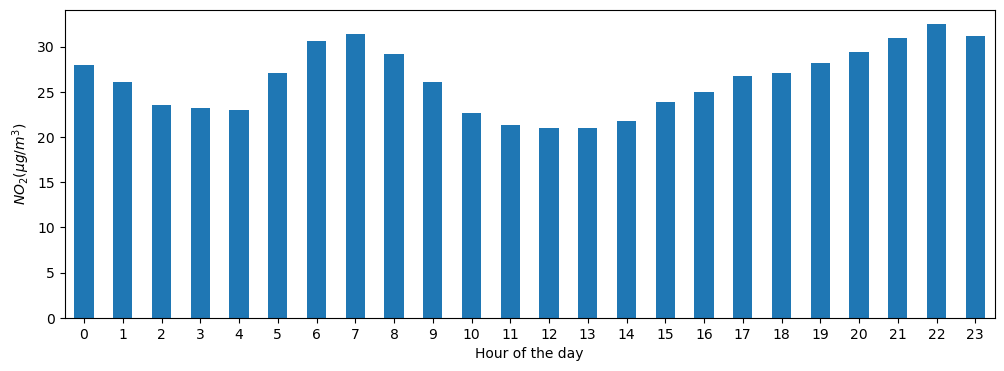

In [120]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)

plt.xlabel("Hour of the day"); # custom x label using matplotlib
plt.ylabel("$NO_2 (µg/m^3)$");

In [121]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [122]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

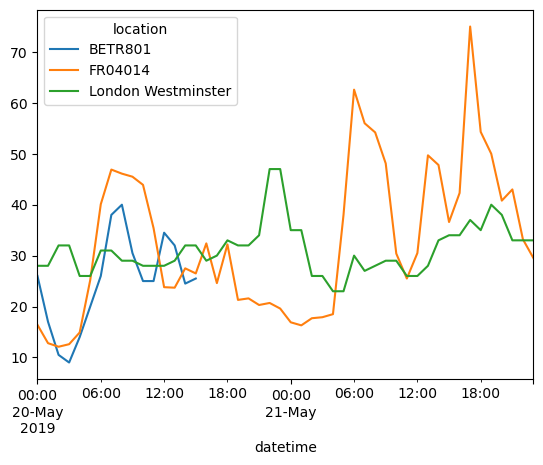

In [123]:
no_2["2019-05-20":"2019-05-21"].plot();

In [124]:
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [125]:
monthly_max.index.freq

<MonthEnd>

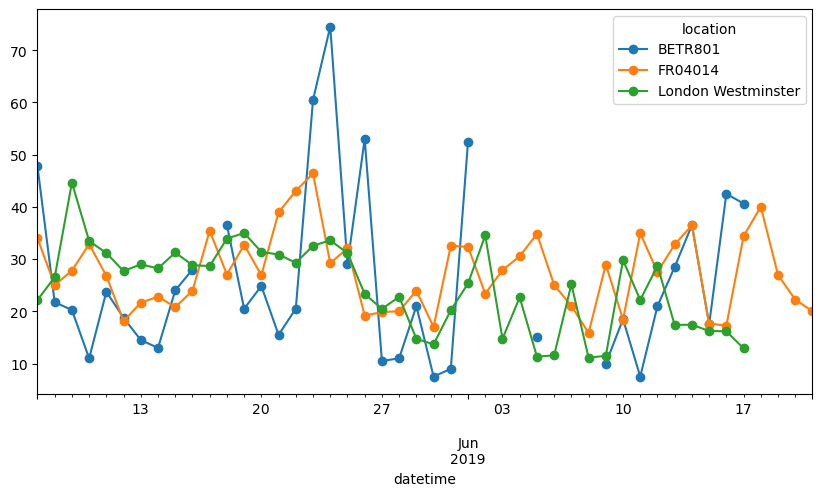

In [126]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));